In [1]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

     |████████████████████████████████| 109 kB 8.6 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from datetime import datetime, timedelta

In [3]:
start = datetime(2010, 1, 1)
end = datetime(2019, 12, 31)
df = data.DataReader('TSLA','yahoo', start, end)
df.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500,4.778
2010-06-30,6.084,4.660,5.158,4.766,85935500,4.766
2010-07-01,5.184,4.054,5.000,4.392,41094000,4.392
2010-07-02,4.620,3.742,4.600,3.840,25699000,3.840
2010-07-06,4.000,3.166,4.000,3.222,34334500,3.222


In [4]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,85.094002,82.538002,83.671997,85.050003,40273500,85.050003
2019-12-26,86.695999,85.269997,85.582001,86.188004,53169500,86.188004
2019-12-27,87.061996,85.222000,87.000000,86.075996,49728500,86.075996
2019-12-30,85.800003,81.851997,85.758003,82.940002,62932000,82.940002
2019-12-31,84.258003,80.416000,81.000000,83.666000,51428500,83.666000


In [5]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-06-29,5.000,3.508,3.800,4.778,93831500,4.778
1,2010-06-30,6.084,4.660,5.158,4.766,85935500,4.766
2,2010-07-01,5.184,4.054,5.000,4.392,41094000,4.392
3,2010-07-02,4.620,3.742,4.600,3.840,25699000,3.840
4,2010-07-06,4.000,3.166,4.000,3.222,34334500,3.222


In [6]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,5.000,3.508,3.800,4.778,93831500
1,6.084,4.660,5.158,4.766,85935500
2,5.184,4.054,5.000,4.392,41094000
3,4.620,3.742,4.600,3.840,25699000
4,4.000,3.166,4.000,3.222,34334500


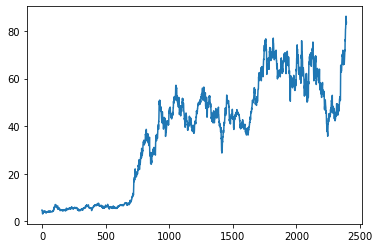

In [7]:
plt.plot(df.Close)

In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2389    56.71740
2390    57.12264
2391    57.52190
2392    57.88446
2393    58.24452
Name: Close, Length: 2394, dtype: float64

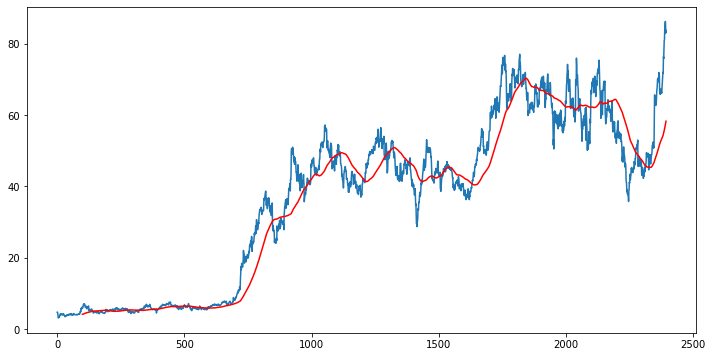

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2389    52.43210
2390    52.57408
2391    52.71450
2392    52.85377
2393    53.00261
Name: Close, Length: 2394, dtype: float64

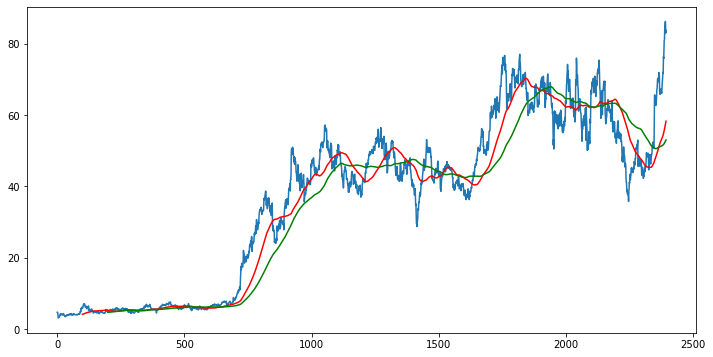

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [12]:
df.shape

(2394, 5)

In [13]:
# Splitting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1675, 1)
(719, 1)


In [14]:
data_training.head()

,Close
0,4.778
1,4.766
2,4.392
3,3.840
4,3.222


In [15]:
data_testing.head()

,Close
1675,51.198002
1676,51.400002
1677,49.245998
1678,49.998001
1679,50.004002


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02993635],
       [0.02971432],
       [0.02279456],
       ...,
       [0.94889726],
       [0.96799142],
       [0.9536338 ]])

In [18]:
data_training_array.shape

(1675, 1)

In [19]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
x_train.shape

(1575, 100, 1)

In [21]:
#ML Model

In [22]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [23]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3)) 


model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [25]:
model.compile(optimizer = 'adam', loss= 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
50/50 [==============================] - 35s 618ms/step - loss: 0.0676
Epoch 2/50
50/50 [==============================] - 16s 310ms/step - loss: 0.0122
Epoch 3/50
50/50 [==============================] - 12s 238ms/step - loss: 0.0108
Epoch 4/50
50/50 [==============================] - 12s 243ms/step - loss: 0.0115
Epoch 5/50
50/50 [==============================] - 12s 240ms/step - loss: 0.0101
Epoch 6/50
50/50 [==============================] - 12s 244ms/step - loss: 0.0090
Epoch 7/50
50/50 [==============================] - 12s 245ms/step - loss: 0.0102
Epoch 8/50
50/50 [==============================] - 12s 241ms/step - loss: 0.0083
Epoch 9/50
50/50 [==============================] - 14s 286ms/step - loss: 0.0093
Epoch 10/50
50/50 [==============================] - 12s 244ms/step - loss: 0.0084
Epoch 11/50
50/50 [==============================] - 12s 244ms/step - loss: 0.0071
Epoch 12/50
50/50 [==============================] - 12s 247ms/step - loss: 0.0076
Epoch 13/50
5

In [26]:
model.save('keras_model.h5')

In [27]:
data_testing.head()

,Close
1675,51.198002
1676,51.400002
1677,49.245998
1678,49.998001
1679,50.004002


In [28]:
data_training.tail(100)

,Close
1575,40.139999
1576,40.806000
1577,42.740002
1578,42.282001
1579,41.692001
...,...
1670,55.952000
1671,53.790001
1672,54.445999
1673,55.478001


In [29]:
past_100_days = data_training.tail(100)

In [30]:
final_df = past_100_days.append(data_testing, ignore_index = True)

In [31]:
final_df.head()

,Close
0,40.139999
1,40.806000
2,42.740002
3,42.282001
4,41.692001


In [32]:
input_data = scaler.transform(final_df)
input_data

array([[0.68420662],
       [0.696529  ],
       [0.73231205],
       [0.72383809],
       [0.71292187],
       [0.68531677],
       [0.66907191],
       [0.68513171],
       [0.68198639],
       [0.68720393],
       [0.68250444],
       [0.66870186],
       [0.65926583],
       [0.67828596],
       [0.69478985],
       [0.67828596],
       [0.6819494 ],
       [0.69182945],
       [0.69027528],
       [0.6899053 ],
       [0.69645497],
       [0.68150532],
       [0.67321642],
       [0.64753554],
       [0.63728537],
       [0.63506515],
       [0.64668442],
       [0.65649049],
       [0.66289222],
       [0.64483424],
       [0.62740526],
       [0.63928363],
       [0.61297367],
       [0.62155864],
       [0.62215067],
       [0.63965361],
       [0.62618416],
       [0.62433391],
       [0.6489417 ],
       [0.65623146],
       [0.66921998],
       [0.66725871],
       [0.64302104],
       [0.64239196],
       [0.61456482],
       [0.61304763],
       [0.63277088],
       [0.629

In [33]:
input_data.shape

(819, 1)

In [34]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

In [35]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(719, 100, 1)
(719,)


In [36]:
## Making predictions

y_predicted = model.predict(x_test)

In [37]:
y_predicted.shape

(719, 1)

In [38]:
y_test

array([0.88880258, 0.89253999, 0.85268647, 0.86660008, 0.8667111 ,
       0.86841327, 0.8724467 , 0.87111457, 0.86141945, 0.85505477,
       0.84776494, 0.84328743, 0.85246449, 0.89624035, 0.88784043,
       0.91122705, 0.90919181, 0.91074598, 0.86915337, 0.88517612,
       0.88432506, 0.91533451, 0.94145942, 0.96821347, 0.96795444,
       0.96995262, 0.97135879, 1.04618114, 1.06534935, 1.03315571,
       1.04684727, 1.06105682, 1.09750593, 1.0838884 , 1.03996447,
       1.06645943, 1.05698635, 1.05258287, 1.07208407, 1.0609458 ,
       1.07238008, 1.08137209, 1.10268649, 1.089291  , 1.08359239,
       1.1037226 , 1.13613828, 1.12155861, 1.09243632, 1.03485788,
       1.08255621, 1.07826376, 1.13032857, 1.14498221, 1.13713741,
       1.14346503, 1.11042034, 1.11460184, 1.07426732, 1.09998519,
       1.09173328, 1.08995707, 1.06594137, 1.08947599, 1.11393578,
       1.1446862 , 1.18154227, 1.20341184, 1.20104347, 1.19911932,
       1.22676134, 1.24722468, 1.27238751, 1.31068679, 1.26376

In [39]:
y_predicted

array([[0.86313367],
       [0.85890275],
       [0.8501622 ],
       [0.83691114],
       [0.8208921 ],
       [0.8041164 ],
       [0.78857046],
       [0.7759472 ],
       [0.7671492 ],
       [0.7620561 ],
       [0.7599244 ],
       [0.75964195],
       [0.76017535],
       [0.7612045 ],
       [0.7641179 ],
       [0.7693178 ],
       [0.7772448 ],
       [0.7872598 ],
       [0.79812855],
       [0.80692637],
       [0.81252384],
       [0.81478274],
       [0.8153273 ],
       [0.8164058 ],
       [0.82004255],
       [0.826712  ],
       [0.83563894],
       [0.84539163],
       [0.8569242 ],
       [0.8707293 ],
       [0.8849218 ],
       [0.8979331 ],
       [0.90899915],
       [0.91882837],
       [0.92709696],
       [0.9316236 ],
       [0.93259776],
       [0.930436  ],
       [0.92584723],
       [0.9205255 ],
       [0.91530216],
       [0.9111414 ],
       [0.9088288 ],
       [0.9092668 ],
       [0.9118825 ],
       [0.9154774 ],
       [0.9197527 ],
       [0.925

In [40]:
scaler.scale_

array([0.01850207])

In [41]:
scale_factor = 1/0.01984363
y_predicted = y_predicted * scale_factor
y_test = y_test*scale_factor

<function matplotlib.pyplot.show>

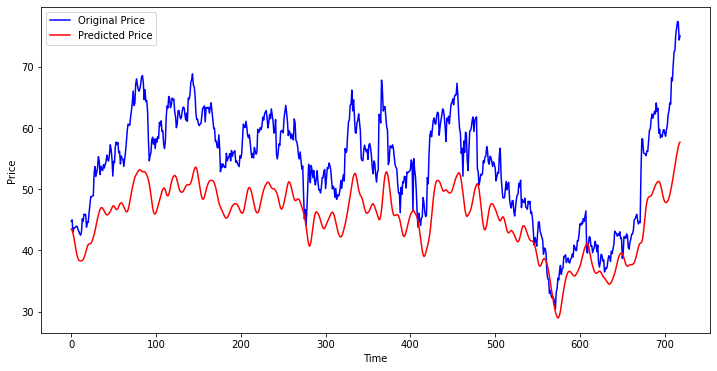

In [42]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show